# NOTE this may be outdated - see the ELISA / SWATH comparison instead

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
from scipy import optimize
from scipy.stats import sem, ttest_ind

import os
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker
from venn import venn, pseudovenn
import seaborn as sns
from matplotlib.collections import PathCollection

from Bio import SeqIO, SeqUtils
from Bio.SeqUtils.ProtParam import ProteinAnalysis

from addict import Dict

In [4]:
sys.path.append("/home/chase/codes/python_functions/")
import plotting as my_plot

In [5]:
hcp_ppm = [4.00E+05, 1.27E+05, 1.01E+05, 1.62E+05, 6.07E+05, 7.18E+05, 1.51E+03, 1.49E+05, 1.12E+04]
labels = ['HCCF Feed', 'HCCF Large agg.', 'HCCF Small agg.', 'HCCF mAb', 'HCCF SPF 1', 'HCCF SPF 2',
          'PAVIN Feed', 'PAVIN Large agg.', 'PAVIN Small agg.',]

df = pd.DataFrame()
df['name'] = labels
df['hcp_ppm'] = hcp_ppm

In [6]:
# df.to_csv('./data/elisa_hcp_content_of_sec_fracs.csv', index=False)

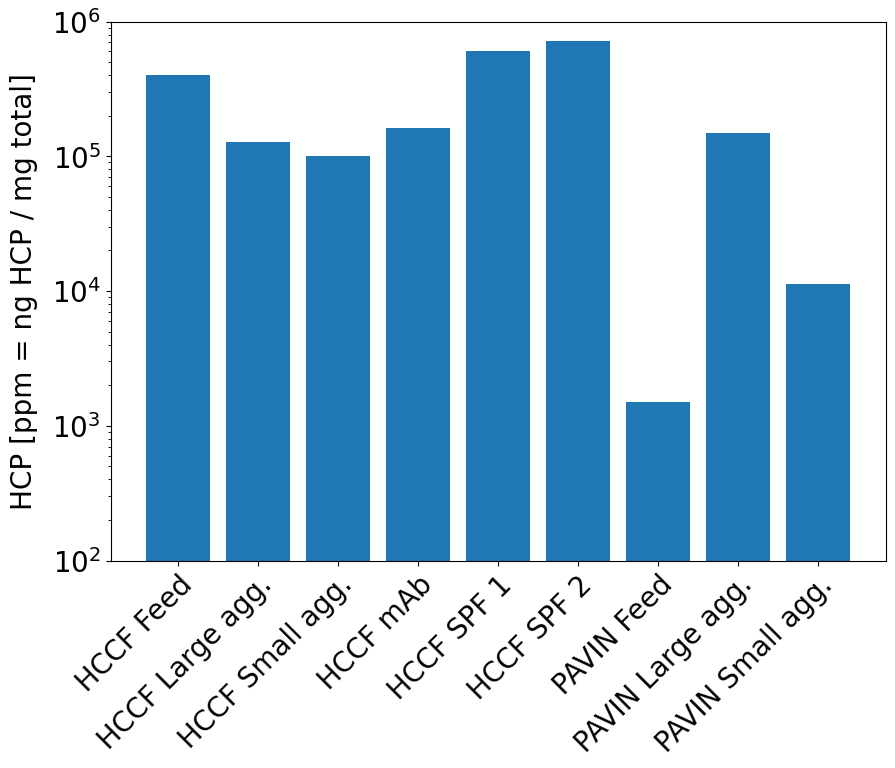

In [8]:
fig, ax = my_plot.instantiate_fig(x=10, y=7, ylabel='HCP [ppm = ng HCP / mg total]')
ticks = ax.set_xticks(df.index, df.name, rotation=45, ha='right', rotation_mode='anchor')
rects_1 = ax.bar(df.index, df.hcp_ppm)
ax.set_yscale('log')
ylim = ax.set_ylim(1e2, 1e6)

plt.savefig('./images/7_ELISA_results_SEC_fractions.png', dpi=300, bbox_inches='tight')

In [11]:
df_bar = pd.read_csv('./generated_tables/std_vs_native_bar.csv')
df_bar['total'] = df_bar.std_unique + df_bar.native_total
df_bar = df_bar.merge(df, on='name', how='outer')
df_bar.native_total = df_bar.native_total.astype(float)
df_bar.at[7, 'native_total'] = float('NaN')
df_bar

,name,std_unique,intersection,native_unique,std_total,native_total,total,hcp_ppm
0,HCCF $\bigcup$ PAFVIN,81,1414,1167,1495,2581.0,2662,NaN
1,HCCF Union,90,1375,950,1465,2325.0,2415,NaN
2,HCCF Feed,33,440,622,473,1062.0,1095,400000.0
3,HCCF Large agg.,43,907,802,950,1709.0,1752,127000.0
4,HCCF Small agg.,32,732,658,764,1390.0,1422,101000.0
5,HCCF mAb,9,192,401,201,593.0,602,162000.0
6,HCCF SPF 1,77,594,418,671,1012.0,1089,607000.0
7,HCCF SPF 2,504,0,0,504,NaN,504,718000.0
8,PAFVIN Union,15,599,1139,614,1738.0,1753,NaN
9,PAFVIN Feed,2,8,96,10,104.0,106,1510.0


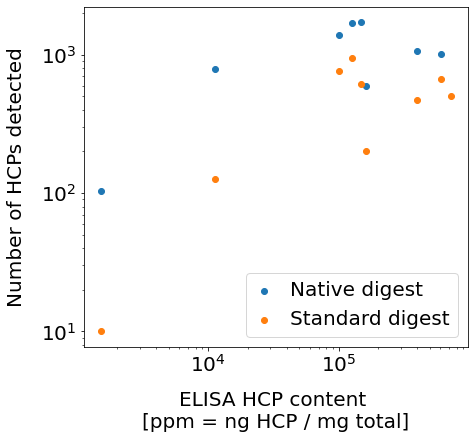

In [12]:
fig, ax = my_plot.instantiate_fig(x=7, y=6.5, xlabel='ELISA HCP content \n[ppm = ng HCP / mg total]', ylabel='Number of HCPs detected', xpad=15, ypad=15)
ax.scatter(df_bar.hcp_ppm, df_bar.native_total, label='Native digest')
ax.scatter(df_bar.hcp_ppm, df_bar.std_total, label='Standard digest')
ax.set_xscale('log')
ax.set_yscale('log')

my_plot.set_layout(fig, ax, legend=True, frameon=True)
# plt.savefig('./images/7_ELISA_results_correlation_with_n_HCPs.png', dpi=300, bbox_inches='tight')

In [13]:
large_percent, small_percent = (1.4854654200939266, 1.6128069239294494)
large_frac = large_percent / 100
small_frac = small_percent / 100
other_frac = 1.0 - large_frac - small_frac

In [14]:
df

,name,hcp_ppm
0,HCCF Feed,400000.0
1,HCCF Large agg.,127000.0
2,HCCF Small agg.,101000.0
3,HCCF mAb,162000.0
4,HCCF SPF 1,607000.0
5,HCCF SPF 2,718000.0
6,PAFVIN Feed,1510.0
7,PAFVIN Large agg.,149000.0
8,PAFVIN Small agg.,11200.0


In [15]:
149000.0 * large_frac + 11200.0 * small_frac

2393.977851420049

In [16]:
2393.977851420049/1510.0

1.5854157956424164